# **This notebook help to create a model to classify a document in new category.**

# Imports

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
sys.path.append(os.path.realpath('../'))
sys.path.append(os.path.realpath('../../'))
from scripts.create_dataset import genererate_dataframe
from scripts.preprocess_data import Preprocces
from scripts.create_model import PreproccesModel
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s[%(name)s][%(levelname)s] %(message)s',
                    datefmt='[%Y-%m-%d][%H:%M:%S]')


logger = logging.getLogger(__name__)

In [3]:
path= '../../dataset/'

# Pre-proccesing data

In [4]:
df = genererate_dataframe(path)

[2020-11-29][13:48:22][scripts.create_dataset][INFO] Loading files
[2020-11-29][13:48:25][scripts.create_dataset][INFO] Dataframe generated


In [5]:
df.head()

,Text,label,documentName
0,\nIn article <C4KvJF.4qo@well.sf.ca.us> metare...,exploration,59497
1,Article-I.D.: cs.constants_733694246\n\n\nCONS...,exploration,59846
2,Article-I.D.: cs.controversy_733694426\n\n\nCO...,exploration,59848
3,Article-I.D.: cs.groups_733694492\n\n\nSPACE A...,exploration,59849
4,Article-I.D.: cs.astronaut_733694515\n\n\nHOW ...,exploration,59850


In [6]:
df.tail()

,Text,label,documentName
3888,\nAs quoted from <1993Apr17.025258.7013@micros...,weapons,55246
3889,\nIn article <2071@rwing.UUCP> pat@rwing.UUCP ...,weapons,55247
3890,07:24:55 GMT\n <1qjmnuINNlmd@cl...,weapons,55473
3891,\nAs quoted from <1993Apr18.000152.2339@gnv.if...,weapons,55474
3892,\nPoliticians want to eliminate private owners...,weapons,55475


In [7]:
preprocces =Preprocces(df)

In [8]:
df = preprocces.clean_dataframe()

[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Shape of dataframe:(3893, 3)
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Checking is there is null values
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Checking duplicates values
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Remove duplicates values: 20
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Clean text
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Remove digits and digits with words example : 460bc --> ""
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Transform words to lowercase example: Electronics --> electronics
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Remove special characters example : $# -->"" 
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Remove words with lenght less than three example : for --> "" 
[2020-11-29][13:48:25][scripts.preprocess_data][INFO] Remove stop words example : the --> "" 
[2020-11-29][13:48:29][scripts.preprocess_data][INFO] Dat

In [9]:
df.head()

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
0,\nIn article <C4KvJF.4qo@well.sf.ca.us> metare...,exploration,59497,article flandern writes cameron randale bass w...,97,73
1,Article-I.D.: cs.constants_733694246\n\n\nCONS...,exploration,59846,article constants equations calculations list ...,362,196
2,Article-I.D.: cs.controversy_733694426\n\n\nCO...,exploration,59848,article controversial questions issues periodi...,914,616
3,Article-I.D.: cs.groups_733694492\n\n\nSPACE A...,exploration,59849,article space activist interest research group...,1091,558
4,Article-I.D.: cs.astronaut_733694515\n\n\nHOW ...,exploration,59850,article astronaut short form authored henry sp...,1021,517


In [10]:
df.tail()

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
3864,\nAs quoted from <1993Apr17.025258.7013@micros...,weapons,55246,quoted anthony francisco cmort anybody wanted ...,68,64
3865,\nIn article <2071@rwing.UUCP> pat@rwing.UUCP ...,weapons,55247,article myrto writes find hard understand come...,57,53
3866,07:24:55 GMT\n <1qjmnuINNlmd@cl...,weapons,55473,clubs member borrow weapons suprised supposed ...,184,131
3867,\nAs quoted from <1993Apr18.000152.2339@gnv.if...,weapons,55474,quoted press public voting public flow history...,76,60
3868,\nPoliticians want to eliminate private owners...,weapons,55475,politicians want eliminate private ownership g...,45,40


Now there are some statistics and graphics about the data

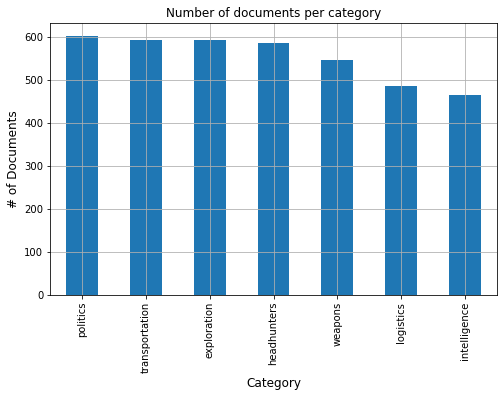

In [11]:
preprocces.plot_categories(df)

In [12]:
stats_words = preprocces.stast_df(df)

[2020-11-29][13:48:29][scripts.preprocess_data][INFO] Total of Unique words in text :32352
[2020-11-29][13:48:29][scripts.preprocess_data][INFO] Total of words in text :433695


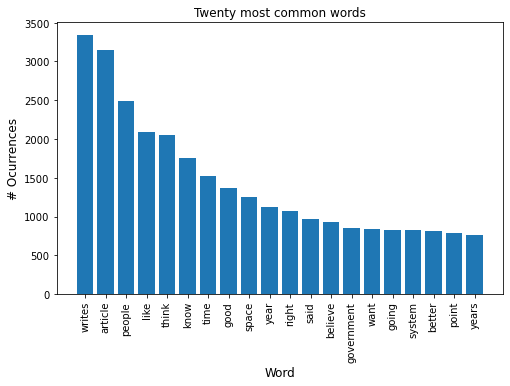

In [13]:
preprocces.plot_common_words(stats_words['count_words'])

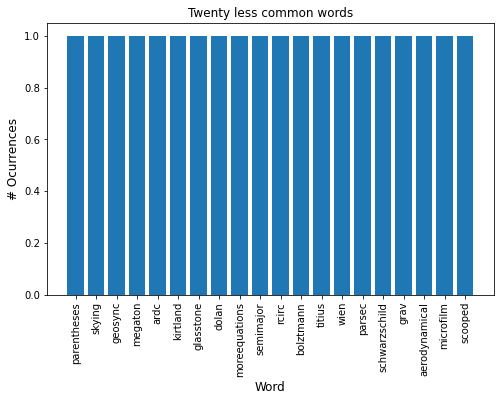

In [14]:
preprocces.plot_less_common_words(stats_words['count_words'])

<AxesSubplot:>

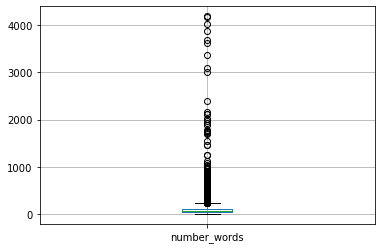

In [15]:
df.boxplot(column=['number_words'])

Mean words per document

In [16]:
np.mean(df['number_words'])

112.09485655208064

<AxesSubplot:>

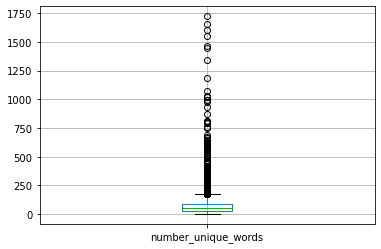

In [17]:
df.boxplot(column=['number_unique_words'])

Mean of unique words for document

In [18]:
np.mean(df['number_unique_words'])

79.30602222796588

In [19]:
df[df['number_words']<250]

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
0,\nIn article <C4KvJF.4qo@well.sf.ca.us> metare...,exploration,59497,article flandern writes cameron randale bass w...,97,73
12,\n\nORBITAL AND PLANETARY LAUNCH SERVICES\n\nT...,exploration,59906,orbital planetary launch services following da...,159,102
18,Article-I.D.: zoo.C51875.67p\n\nIn article <C5...,exploration,60151,article article josh hopkins writes titan laun...,89,71
19,\nIn article <C50zxA.1K9@zoo.toronto.edu> henr...,exploration,60153,article henry spencer writes article writes th...,93,74
20,"\nI have the ""osculating elements at perigee"" ...",exploration,60154,osculating elements perigee orbit need convert...,46,43
...,...,...,...,...,...,...
3864,\nAs quoted from <1993Apr17.025258.7013@micros...,weapons,55246,quoted anthony francisco cmort anybody wanted ...,68,64
3865,\nIn article <2071@rwing.UUCP> pat@rwing.UUCP ...,weapons,55247,article myrto writes find hard understand come...,57,53
3866,07:24:55 GMT\n <1qjmnuINNlmd@cl...,weapons,55473,clubs member borrow weapons suprised supposed ...,184,131
3867,\nAs quoted from <1993Apr18.000152.2339@gnv.if...,weapons,55474,quoted press public voting public flow history...,76,60


Percentage of documents that have at least 250 words

In [20]:
df[df['number_words']<250].shape[0]*100/df.shape[0]

92.55621607650556

Percentage of documents that have at least 200 words

In [21]:
df[df['number_words']<200].shape[0]*100/df.shape[0]

90.02326182476092

# Prepare text for train the Model

In [22]:
import pickle
import keras
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers
from keras import Input
from keras import Model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [23]:
lb = LabelBinarizer()
label = lb.fit_transform(df.label.to_list())
label

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

Saving LabelBinarizer in pickle

In [24]:
try:
    lb = pickle.load(open('../../models/label.pickle','rb'))
except Exception:
    pickle.dump(lb, open('../../models/label.pickle', 'wb'))


following the previous percentage, it is selected as **MAX_SEQUENCE_LENGTH = 250**

In [25]:
MAX_NB_WORDS= len(stats_words['unique_words'])
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [26]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df.Cleaned_text)
sequences = tokenizer.texts_to_sequences(df.Cleaned_text)



In [27]:
try:
    token = pickle.load(open('../../models/tokenizer.pickle','rb'))
except Exception:
    pickle.dump(tokenizer, open('../../models/tokenizer.pickle', 'wb'))

In [28]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data= pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 32258 unique tokens.


In [29]:
data

array([[    0,     0,     0, ...,     7,     7,   345],
       [   66,     9, 20321, ..., 10799,  2981,   487],
       [10809,  1928,  5283, ..., 15387,  3268,   456],
       ...,
       [    0,     0,     0, ...,   375,   444,  2882],
       [    0,     0,     0, ...,  4719,  7115,  7700],
       [    0,     0,     0, ...,   286,   539,   790]])

In [30]:
data.shape

(3869, 250)

Split data to train the model

In [31]:
X_Train, X_Test, Y_Train, Y_Test = [],[],[],[]
for labels in set(df.label):
    x = df[df.label==labels]['Cleaned_text']
    y = df[df.label == labels]['label']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,shuffle=True,random_state =0)
    
    X_Train.append(x_train)
    X_Test.append(x_test)
    Y_Train.append(y_train)
    Y_Test.append(y_test)
X_Train = pd.concat(X_Train)
X_Test = pd.concat(X_Test)
Y_Train = pd.concat(Y_Train)
Y_Test = pd.concat(Y_Test)

In [32]:
X_Train.index

Int64Index([2407, 2218, 2651, 2569, 2333, 2390, 2246, 2729, 2522, 2561,
            ...
            1078,  906,  988, 1064,  662,  869,  601,  951,  784, 1151],
           dtype='int64', length=3092)

In [33]:
Y_Train.index

Int64Index([2407, 2218, 2651, 2569, 2333, 2390, 2246, 2729, 2522, 2561,
            ...
            1078,  906,  988, 1064,  662,  869,  601,  951,  784, 1151],
           dtype='int64', length=3092)

In [34]:
X_train_cnn = data[[X_Train.index]]
X_test_cnn = data[[X_Test.index]]
Y_train_cnn = label[[Y_Train.index]]
Y_test_cnn = label[[Y_Test.index]]

In [35]:
X_train_cnn.shape, X_test_cnn.shape , Y_train_cnn.shape , Y_test_cnn.shape

((3092, 250), (777, 250), (3092, 7), (777, 7))

Saving train and test data to train the model 

In [36]:
pickle.dump(X_train_cnn, open('../../models/X_train_cnn.pickle', 'wb'))
pickle.dump(X_test_cnn, open('../../models/X_test_cnn.pickle', 'wb'))
pickle.dump(Y_train_cnn, open('../../models/Y_train_cnn.pickle', 'wb'))
pickle.dump(Y_test_cnn, open('../../models/Y_test_cnn.pickle', 'wb'))

In [37]:
Y_test_cnn

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

Loading embeddings from glove with dimmension 100 

In [38]:
embeddings_index = {}
f = open('../../glove/glove.6B.100d.txt',encoding='ISO-8859-1')
for line in f:
    try:
        values = line.split()
        word = values[0]
        coefs = np.array(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except:
        pass
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 399883 word vectors.


In [39]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [40]:
embedding_matrix.shape

(32259, 100)

In [41]:
pickle.dump(embedding_matrix, open('../../models/embedding_matrix.pickle', 'wb'))

# CNN model

In [42]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [43]:
pat = 5 
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

In [44]:
model_checkpoint_cnn = ModelCheckpoint('../../models/cnn_model.h5', verbose=1, save_best_only=True)

In [45]:
sequence_input = Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(sequence_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(Y_train_cnn[0]), activation="softmax")(x)
model_cnn = Model(sequence_input, preds)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model_cnn.summary()

[2020-11-29][13:58:31][tensorflow][WARNING] From C:\Users\LW946LH\AppData\Local\Continuum\anaconda3\envs\pruebaea\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[2020-11-29][13:58:31][tensorflow][WARNING] From C:\Users\LW946LH\AppData\Local\Continuum\anaconda3\envs\pruebaea\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          3225900   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 246, 128)          64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 45, 128)           82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 128)            0   

In [46]:
def fit_and_evaluate_cnn(t_x, val_x, t_y, val_y, EPOCHS=20, BATCH_SIZE=128):
    model = None
    model = model_cnn
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint_cnn], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

Training model using cross validation with k = 3

In [47]:
n_folds=3
epochs=20
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history_cnn = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(X_train_cnn, Y_train_cnn, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history_cnn.append(fit_and_evaluate_cnn(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1


[2020-11-29][13:58:34][tensorflow][WARNING] From C:\Users\LW946LH\AppData\Local\Continuum\anaconda3\envs\pruebaea\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 2503 samples, validate on 279 samples
Epoch 1/20
2503/2503 [==============================] - 4s 1ms/step - loss: 1.9975 - acc: 0.1706 - val_loss: 1.9177 - val_acc: 0.2330

Epoch 00001: val_loss improved from inf to 1.91768, saving model to ../../models/cnn_model.h5
Epoch 2/20
2503/2503 [==============================] - 3s 1ms/step - loss: 1.8659 - acc: 0.2325 - val_loss: 1.7960 - val_acc: 0.3835

Epoch 00002: val_loss improved from 1.91768 to 1.79604, saving model to ../../models/cnn_model.h5
Epoch 3/20
2503/2503 [==============================] - 4s 2ms/step - loss: 1.5828 - acc: 0.3795 - val_loss: 1.2971 - val_acc: 0.5484

Epoch 00003: val_loss improved from 1.79604 to 1.29710, saving model to ../../models/cnn_model.h5
Epoch 4/20
2503/2503 [==============================] - 4s 2ms/step - loss: 1.2645 - acc: 0.4950 - val_loss: 1.0886 - val_acc: 0.6595

Epoch 00004: val_loss improved from 1.29710 to 1.08863, saving model to ../../models/cnn_model.h5
Epoch 5/20
2503/2503 [===

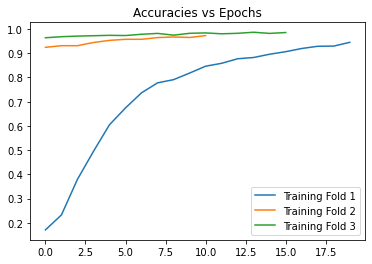

In [48]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history_cnn[0].history['acc'], label='Training Fold 1')
plt.plot(model_history_cnn[1].history['acc'], label='Training Fold 2')
plt.plot(model_history_cnn[2].history['acc'], label='Training Fold 3')
plt.legend()
plt.show()

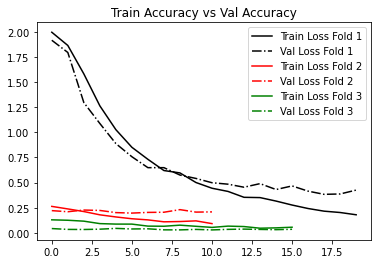

In [49]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history_cnn[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(model_history_cnn[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history_cnn[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(model_history_cnn[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history_cnn[2].history['loss'], label='Train Loss Fold 3', color='green', )
plt.plot(model_history_cnn[2].history['val_loss'], label='Val Loss Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

In [50]:
cnn_model = load_model('../../models/cnn_model.h5')

In [51]:
predict_cnn = cnn_model.predict(X_test_cnn)

In [52]:
print(confusion_matrix(np.argmax(Y_test_cnn, axis=1), np.argmax(predict_cnn, axis=1)))

[[108   2   2   2   3   1   1]
 [  3 111   1   0   0   3   0]
 [  1   0  83   1   0   1   7]
 [  1   1   6  89   0   0   0]
 [  1   1   2   0 117   0   0]
 [  3   1   0   0   3 108   4]
 [  0   1   5   1   0   3 100]]


In [53]:
print(classification_report(np.argmax(Y_test_cnn, axis=1), np.argmax(predict_cnn, axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       119
           1       0.95      0.94      0.94       118
           2       0.84      0.89      0.86        93
           3       0.96      0.92      0.94        97
           4       0.95      0.97      0.96       121
           5       0.93      0.91      0.92       119
           6       0.89      0.91      0.90       110

    accuracy                           0.92       777
   macro avg       0.92      0.92      0.92       777
weighted avg       0.92      0.92      0.92       777



In [54]:
preprocces_model = PreproccesModel(df,stats_words)

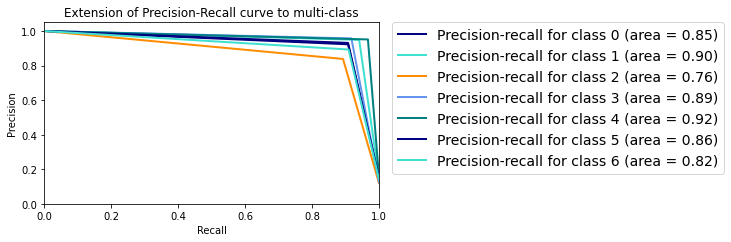

In [55]:
preprocces_model.plot_precision_recall_curve(np.argmax(predict_cnn, axis=1),np.argmax(Y_test_cnn, axis=1))

# LSTM Model

In [56]:
word_vec_large = TfidfVectorizer(
    analyzer='word',
    max_df=0.65,
    min_df=0.02,
    ngram_range=(1, 1),
    max_features=len(stats_words['unique_words']))

In [57]:
tfidf_large = word_vec_large.fit(df.Cleaned_text)

In [58]:
try:
    tfidf_large = pickle.load(open('../../models/tfidf.pickle','rb'))
except Exception:
    pickle.dump(tfidf_large, open('../../models/tfidf.pickle', 'wb'))

In [59]:
len(word_vec_large.get_feature_names())

723

In [60]:
X_train, X_test, Y_train, Y_test = [],[],[],[]
for label in set(df.label):
    x = df[df.label==label]['Cleaned_text']
    y = df[df.label == label]['label']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,shuffle=True,random_state =0)
    
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)
X_train = pd.concat(X_train)
X_test = pd.concat(X_test)
Y_train = lb.transform(pd.concat(Y_train).to_list())
Y_test = lb.transform(pd.concat(Y_test).to_list())

In [61]:
X_train.shape, X_test.shape , Y_train.shape , Y_test.shape

((3092,), (777,), (3092, 7), (777, 7))

In [62]:
tfidf_train_large = word_vec_large.transform(X_train)
tfidf_test_large = word_vec_large.transform(X_test)

In [63]:
df_tfidf_large = pd.DataFrame(data=tfidf_train_large.toarray(), index=X_train.index, columns=word_vec_large.get_feature_names())
df_tfidf_large.head()

,ability,able,accept,access,according,action,actions,actually,address,advance,...,writing,written,wrong,wrote,yeah,year,years,yesterday,york,young
2407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.11896,0.0,0.0,0.0,0.0
2333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60013,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [64]:
data_dim = tfidf_train_large.shape[1]
data_dim
X_train_lstm = tfidf_train_large.toarray().reshape(tfidf_train_large.shape[0], 1, tfidf_train_large.shape[1])
X_test_lstm = tfidf_test_large.toarray().reshape(tfidf_test_large.shape[0], 1, tfidf_test_large.shape[1])


In [65]:
X_train_lstm.shape

(3092, 1, 723)

In [66]:
model_checkpoint_lstm = ModelCheckpoint('../../models/lstm_model.h5', verbose=1, save_best_only=True)

In [67]:
model_lstm = Sequential()
model_lstm.add(LSTM(200, input_shape=(None, data_dim),return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(Bidirectional(LSTM(100,return_sequences=True,activation='relu')))
model_lstm.add(Dropout(0.5))
model_lstm.add(Bidirectional(LSTM(50,activation='relu')))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(7, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
# history_lstm = model_lstm.fit(X_train_lstm,Y_train, validation_data = (X_test_lstm,Y_test), batch_size=128, epochs=12)

In [68]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 200)         739200    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               100400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                

In [69]:
def fit_and_evaluate_lstm(t_x, val_x, t_y, val_y, EPOCHS=20, BATCH_SIZE=128):
    model = None
    model = model_lstm
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint_lstm], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [70]:
n_folds=3
epochs=20
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history_lstm = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(X_train_lstm, Y_train, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history_lstm.append(fit_and_evaluate_lstm(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Train on 2503 samples, validate on 279 samples
Epoch 1/20
2503/2503 [==============================] - 2s 807us/step - loss: 1.9456 - accuracy: 0.1518 - val_loss: 1.9443 - val_accuracy: 0.1362

Epoch 00001: val_loss improved from inf to 1.94426, saving model to ../../models/lstm_model.h5
Epoch 2/20
2503/2503 [==============================] - 1s 290us/step - loss: 1.9432 - accuracy: 0.2189 - val_loss: 1.9387 - val_accuracy: 0.4229

Epoch 00002: val_loss improved from 1.94426 to 1.93868, saving model to ../../models/lstm_model.h5
Epoch 3/20
2503/2503 [==============================] - 1s 267us/step - loss: 1.9312 - accuracy: 0.2881 - val_loss: 1.9072 - val_accuracy: 0.3405

Epoch 00003: val_loss improved from 1.93868 to 1.90723, saving model to ../../models/lstm_model.h5
Epoch 4/20
2503/2503 [==============================] - 1s 278us/step - loss: 1.8339 - accuracy: 0.3492 - val_loss: 1.6446 - val_accuracy: 0.3835

Epoch 00004: val_loss improved from 1.90723 to 1.64

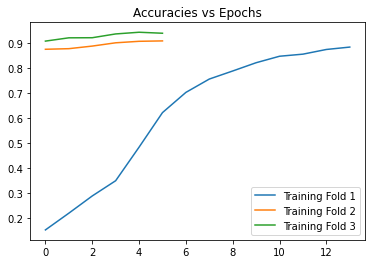

In [71]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history_lstm[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history_lstm[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history_lstm[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

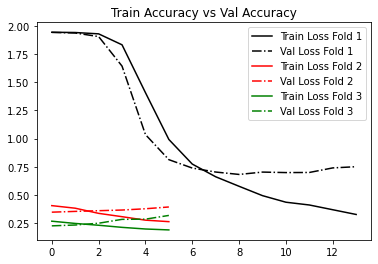

In [72]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history_lstm[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(model_history_lstm[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history_lstm[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(model_history_lstm[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history_lstm[2].history['loss'], label='Train Loss Fold 3', color='green', )
plt.plot(model_history_lstm[2].history['val_loss'], label='Val Loss Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

In [73]:
lstm_model = load_model('../../models/lstm_model.h5')

In [74]:
predict_lstm = lstm_model.predict(X_test_lstm)

In [75]:
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predict_lstm, axis=1)))

[[100   5   3   3   3   4   1]
 [  6 106   1   1   2   2   0]
 [  2   0  69   1   2   5  14]
 [  3   2  11  72   2   0   7]
 [  2   3   2   1 112   0   1]
 [  8   5   6   1   1  94   4]
 [  0   1  10   5   3   3  88]]


In [76]:
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(predict_lstm, axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       119
           1       0.87      0.90      0.88       118
           2       0.68      0.74      0.71        93
           3       0.86      0.74      0.80        97
           4       0.90      0.93      0.91       121
           5       0.87      0.79      0.83       119
           6       0.77      0.80      0.78       110

    accuracy                           0.82       777
   macro avg       0.82      0.82      0.82       777
weighted avg       0.83      0.82      0.83       777



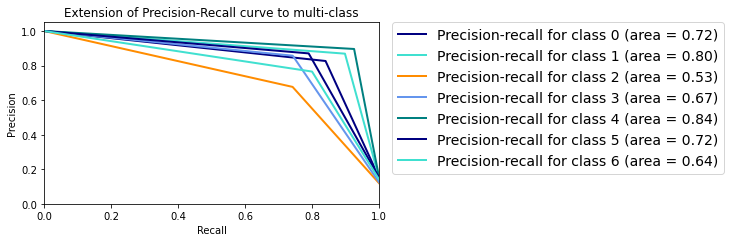

In [77]:
preprocces_model.plot_precision_recall_curve(np.argmax(predict_lstm, axis=1),np.argmax(Y_test, axis=1))

## Comparing the performance of the two models it was decided to stick with the CNN model using the metrics Precision VS Recall

In [78]:
cnn_model.save("../../models/model_cnn.h5")

# Some documents to test the model 

In [83]:
docs = np.random.choice(df.documentName[X_Test.index], 5)
docs

array(['178365', '60919', '104572', '60841', '54564'], dtype=object)

In [84]:
df[df['documentName']==docs[0]]

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
1378,\nIn article <C5M2F9.GEB@news.iastate.edu> atb...,intelligence,178365,article aaron boyken writes state local sales ...,65,46


In [85]:
df[df['documentName']==docs[1]]

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
263,\nIn article <C5r2DK.764@skates.gsfc.nasa.gov>...,exploration,60919,article charles divine writes pointer article ...,53,47


In [86]:
df[df['documentName']==docs[2]]

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
2550,From: CROSEN1@ua1vm.ua.edu (Charles Rosen)\nSu...,politics,104572,charles rosen subject torre worst manager nntp...,224,166


In [87]:
df[df['documentName']==docs[3]]

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
186,\n\nReading from a Amoco Performance Products ...,exploration,60841,reading amoco performance products data sheet ...,192,123


In [88]:
df[df['documentName']==docs[4]]

,Text,label,documentName,Cleaned_text,number_words,number_unique_words
3773,\nIn article <1993Apr16.162447.26289@beaver.cs...,weapons,54564,article stephen graham writes article tavares ...,262,195
